In [1]:
import os
os.chdir('G:\\freecloud\\ThinkpadC_space\\Desktop\\资料\\资料\\量化投资：以Python为工具\\Python Quant Book\\part 4\\025')

In [2]:
import sys
sys.path.append('G:\\freecloud\\ThinkpadC_space\\Desktop\\资料\\资料\\量化投资：以Python为工具\\Python Quant Book\\part 4')
import pandas as pd
from statsmodels.graphics.tsaplots import *
from statsmodels.tsa import stattools
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font=FontProperties(fname='C:/Windows/Fonts/msyh.ttf')
import numpy as np
from arch import arch_model

E:\Data_analysis_plan\python_36_install\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
SHret=pd.read_table('TRD_IndexSum.txt',index_col='Trddt',sep='\t')

SHret.index=pd.to_datetime(SHret.index)

In [4]:
SHret.head()

,Retindex
Trddt,
2009-01-05,0.032904
2009-01-06,0.030004
2009-01-07,-0.006780
2009-01-08,-0.023821
2009-01-09,0.014205


In [5]:
SHret=SHret.sort_index()

In [6]:
import matplotlib.pyplot as plt 
import matplotlib

# 绘制收益率平方序列图

Text(0.5,1,'Absolute Daily Return of SH Index')

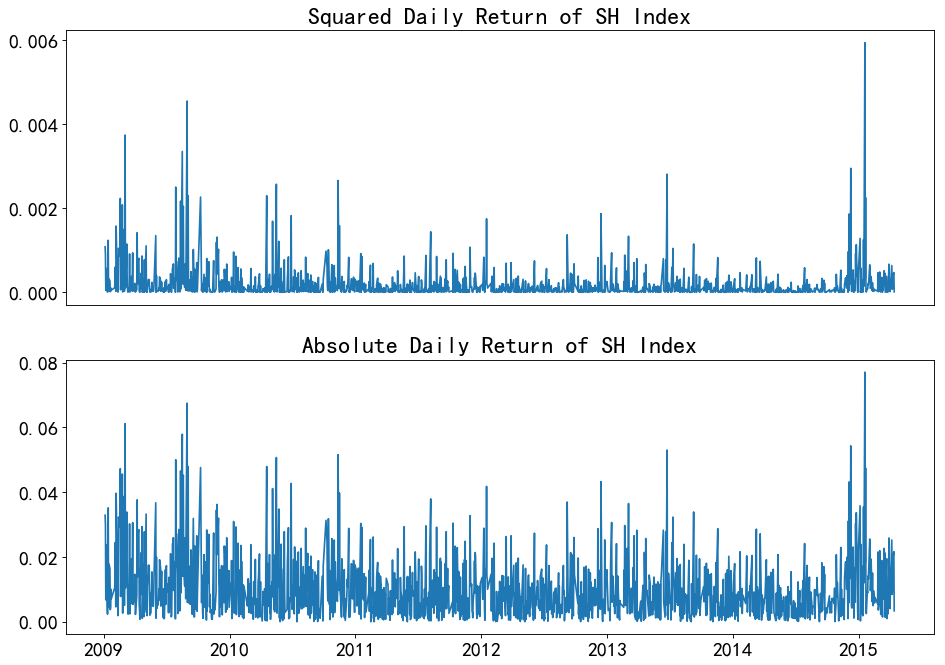

In [7]:
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus']=False
plt.rc('font', family='SimHei', size=18)
plt.figure(figsize=(14,10),dpi=80) 
plt.subplot(211)
plt.plot(SHret**2)
plt.xticks([])
plt.title('Squared Daily Return of SH Index')

plt.subplot(212)
plt.plot(np.abs(SHret))
plt.title('Absolute Daily Return of SH Index')

In [8]:
LjungBox=stattools.q_stat(stattools.acf(SHret**2)[1:13],len(SHret))
LjungBox[1][-1]

2.2324582490603159e-43

In [9]:
am = arch_model(SHret)
model = am.fit(update_freq=0)
print(model.summary())

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -4464.735821933186
            Iterations: 9
            Function evaluations: 61
            Gradient evaluations: 5
                     Constant Mean - GARCH Model Results                      
Dep. Variable:               Retindex   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                4464.74
Distribution:                  Normal   AIC:                          -8921.47
Method:            Maximum Likelihood   BIC:                          -8900.16
                                        No. Observations:                 1522
Date:                Wed, Feb 28 2018   Df Residuals:                     1518
Time:                        22:33:54   Df Model:                            4
                                  Mean Model                           

E:\Data_analysis_plan\python_36_install\lib\site-packages\arch\univariate\base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


In [3]:
import pandas as pd
import os
os.chdir('G:\\freecloud\\ThinkpadC_space\\Desktop\\资料\\资料\量化投资：以Python为工具\\PythonANS')

# 3.读取IBM的日回报数据，检验其是否存在ARCH效应
# ①绘制收益率平方的时间序列图，观察其是否存在波动聚集现象

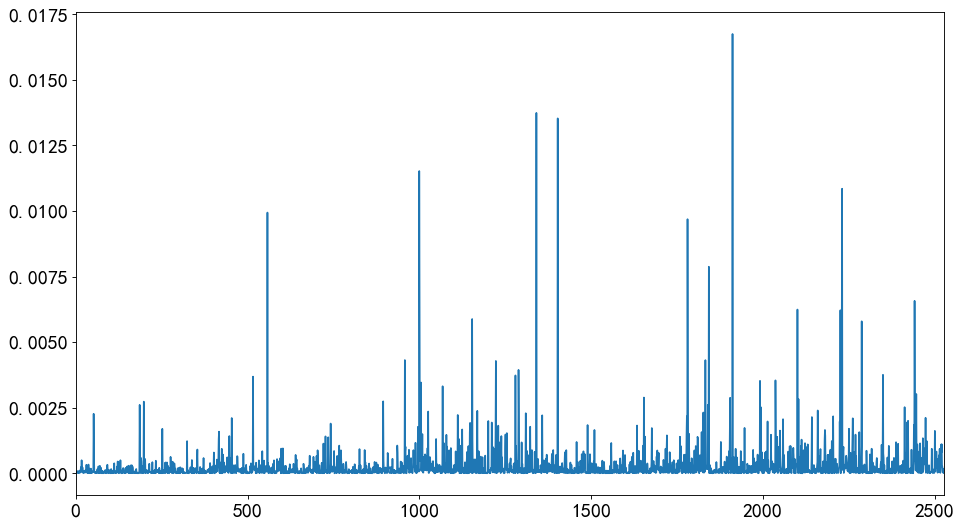

In [11]:
CRSPday=pd.read_csv('Data/Part4/004/CRSPday.csv')
ibm=CRSPday.ibm
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(111) 
plot1=(ibm**2).plot(ax=axe1)

# ②绘制收益率平方的ACF图，检查其是否存在自相关

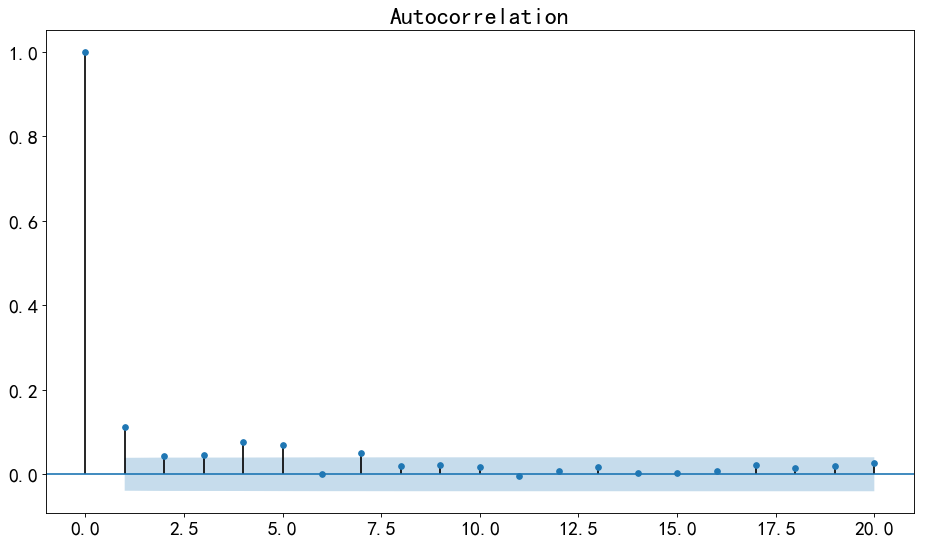

In [12]:
from statsmodels.graphics.tsaplots import *
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(111) 
plot1=plot_acf(ibm**2,lags=20,ax=axe1)

# ③用LjungBox检验其是否存在ARCH效应

In [13]:
from statsmodels.tsa import stattools
LjungBox=stattools.q_stat(stattools.acf(ibm**2)[1:13],len(ibm))
LjungBox[1][-1] 

8.5307836575768438e-12

# 4.（Python2）获取Google股票的月度收益率数据

In [1]:
import sys
import pandas as pd
from statsmodels.graphics.tsaplots import *
from statsmodels.tsa import stattools
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font=FontProperties(fname='C:/Windows/Fonts/msyh.ttf')
import numpy as np
from arch import arch_model

E:\Data_analysis_plan\Python_install\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import pandas_datareader.data as web
import datetime as dt

In [19]:
google = web.DataReader('GOOGL','yahoo',
   dt.datetime(2004,1,1),dt.datetime(2015,12,31))

In [10]:
#python3
google2=pd.read_csv('Data/Part4/004/GOOGL.csv',index_col='Date')

google2.index=pd.to_datetime(google2.index)

In [11]:
#python3
google2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600


In [4]:
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600


In [21]:
google.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-24,768.520020,769.200012,764.390015,765.840027,765.840027,520600
2015-12-28,770.000000,782.820007,767.729980,782.239990,782.239990,1554300
2015-12-29,786.989990,798.690002,786.200012,793.960022,793.960022,1921500
2015-12-30,793.960022,796.460022,787.200012,790.299988,790.299988,1428300
2015-12-31,787.820007,788.330017,777.320007,778.010010,778.010010,1637600


In [20]:
len(google)

2863

# ①绘制其时间序列图，并判断其是否平稳

In [5]:
google = google.asfreq('M','ffill','end')
googleRet = (google.Close-google.Close.shift(1))/google.Close.shift(1)
googleRet = googleRet.dropna()

In [12]:
#python3
google2 = google2.asfreq('M','ffill','end')
googleRet2 = (google2.Close-google2.Close.shift(1))/google2.Close.shift(1)
googleRet2 = googleRet2.dropna()

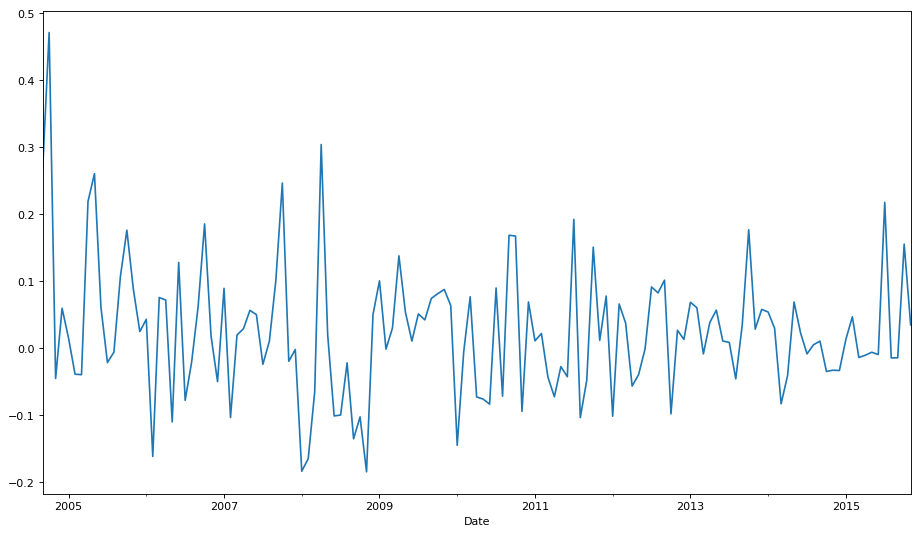

In [13]:
#python3
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(111)
plot1=googleRet2.plot(ax=axe1)
plt.show()

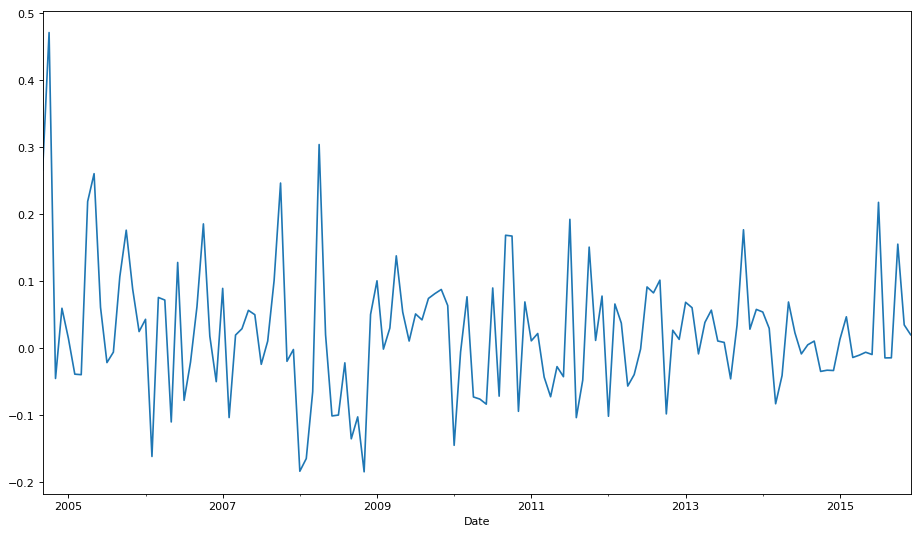

In [6]:
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(111)
plot1=googleRet.plot(ax=axe1)
plt.show()

# ②绘制ACF图及PACF图

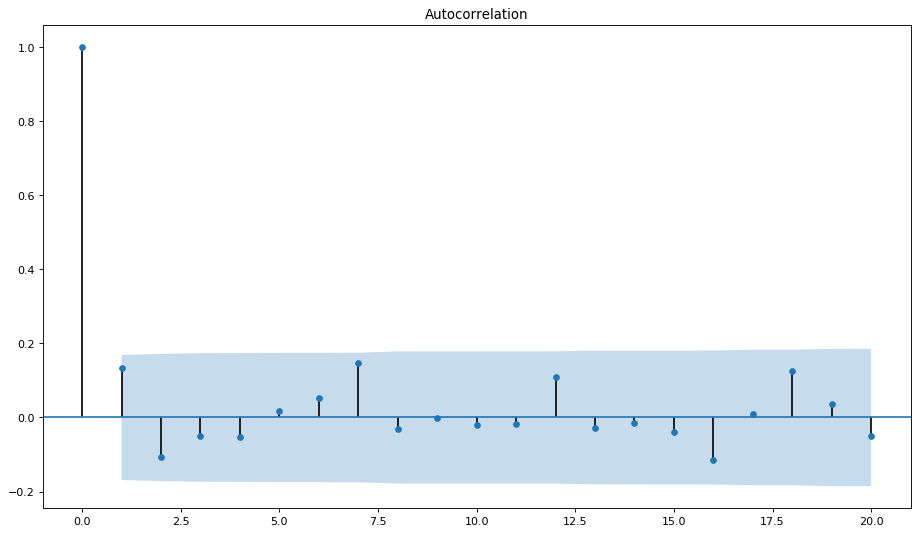

In [14]:
#python3
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(111)
plot1=plot_acf(googleRet2,lags=20,ax=axe1)
plt.show()

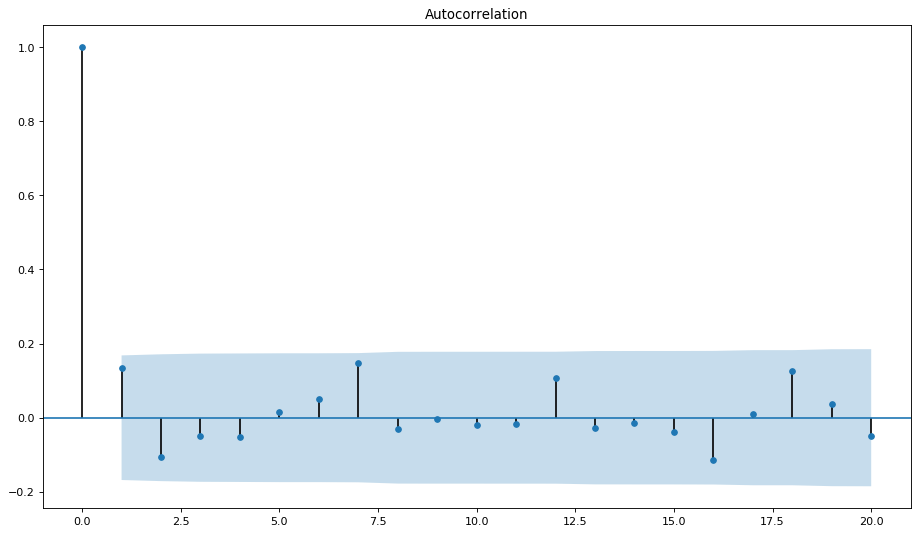

In [7]:
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(111)
plot1=plot_acf(googleRet,lags=20,ax=axe1)
plt.show()

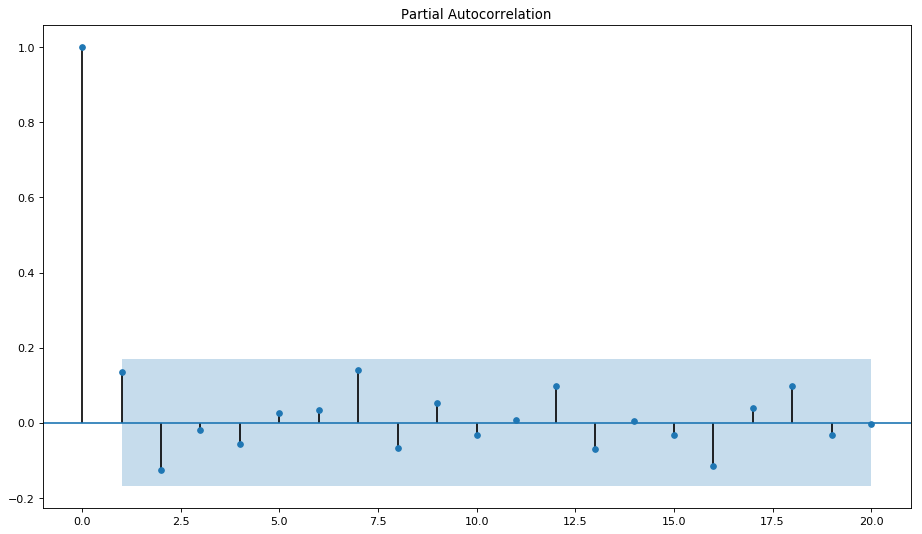

In [15]:
#python3
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(111)
plot1=plot_pacf(googleRet2,lags=20,ax=axe1)
plt.show()

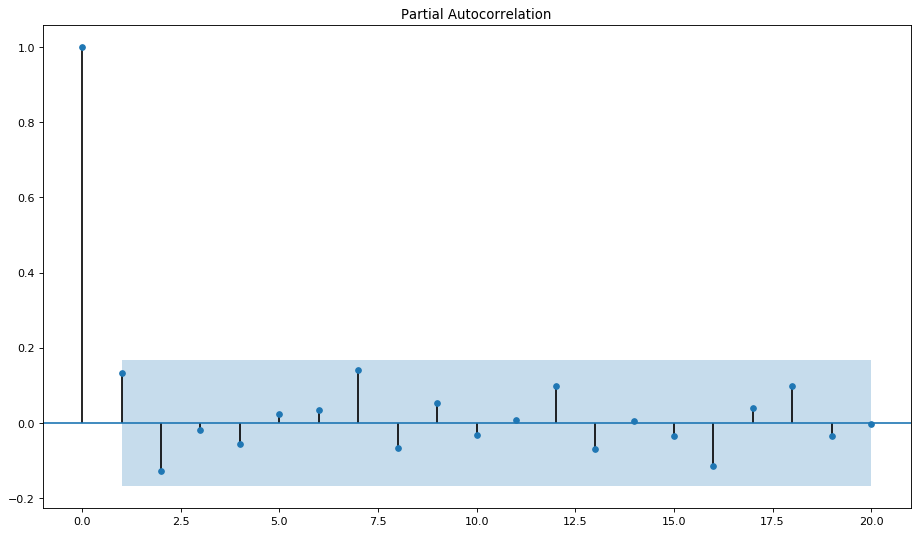

In [8]:
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(111)
plot1=plot_pacf(googleRet,lags=20,ax=axe1)
plt.show()

# ③进行LjungBox检验，判断其是否存在白噪声

In [16]:
#python3
LjungBox=stattools.q_stat(stattools.acf(googleRet2)[1:13],len(googleRet2))
LjungBox[1][-1]

0.58789023463094892

In [9]:
LjungBox=stattools.q_stat(stattools.acf(googleRet)[1:13],len(googleRet))
LjungBox[1][-1]

0.58008200615297767

# ④绘制其平方的时间序列图，判断是否存在波动聚集效应

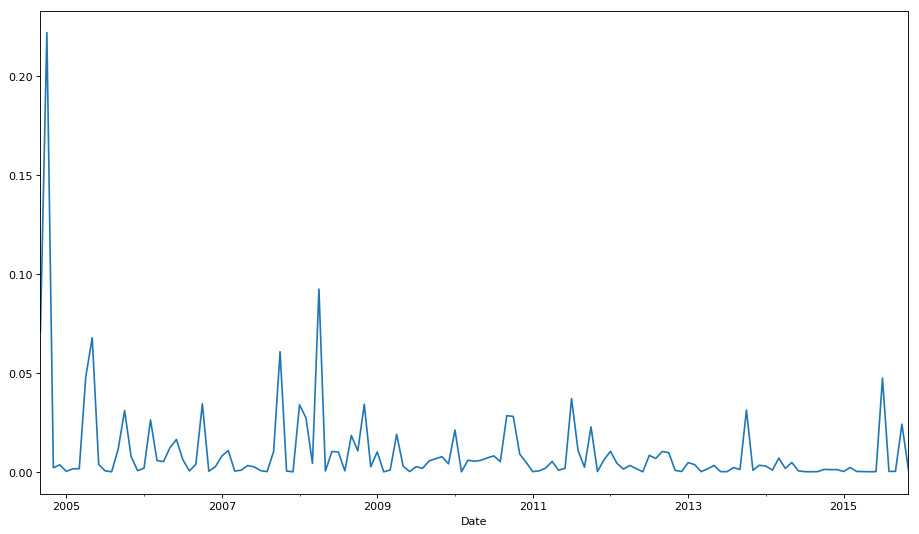

In [17]:
#python3
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(111)
plot1=(googleRet2**2).plot(ax=axe1)
plt.show()

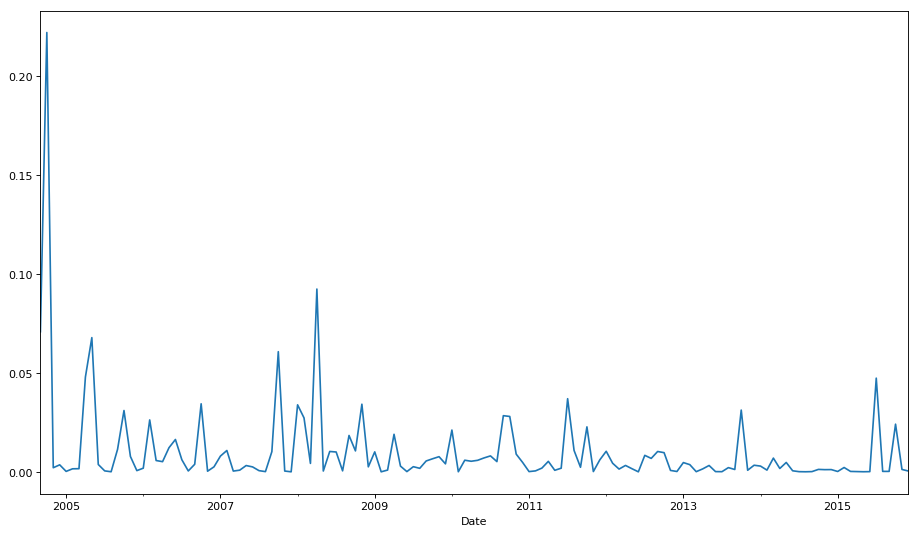

In [10]:
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(111)
plot1=(googleRet**2).plot(ax=axe1)
plt.show()

# ⑤绘制其平方的ACF图以及PACF图

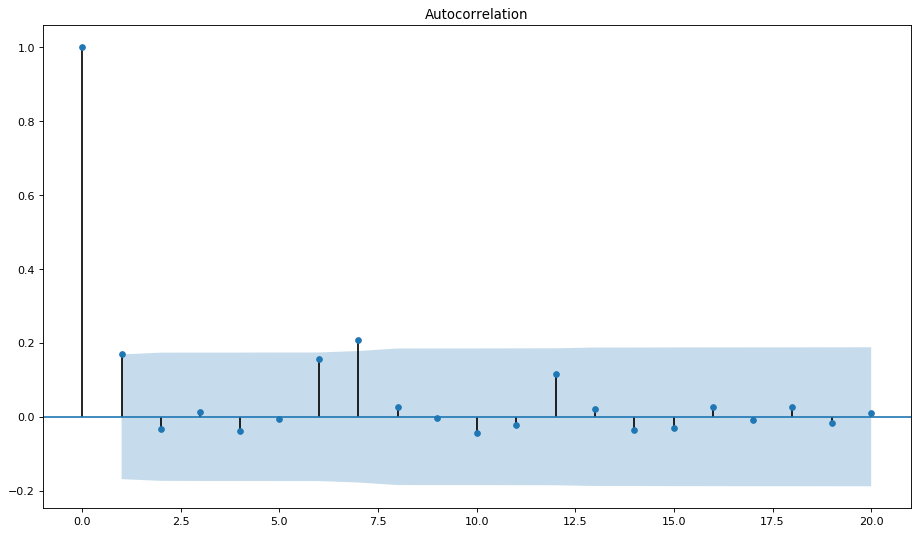

In [18]:
#python3
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(111)
plot1=plot_acf(googleRet2**2,lags=20,ax=axe1)
plt.show()

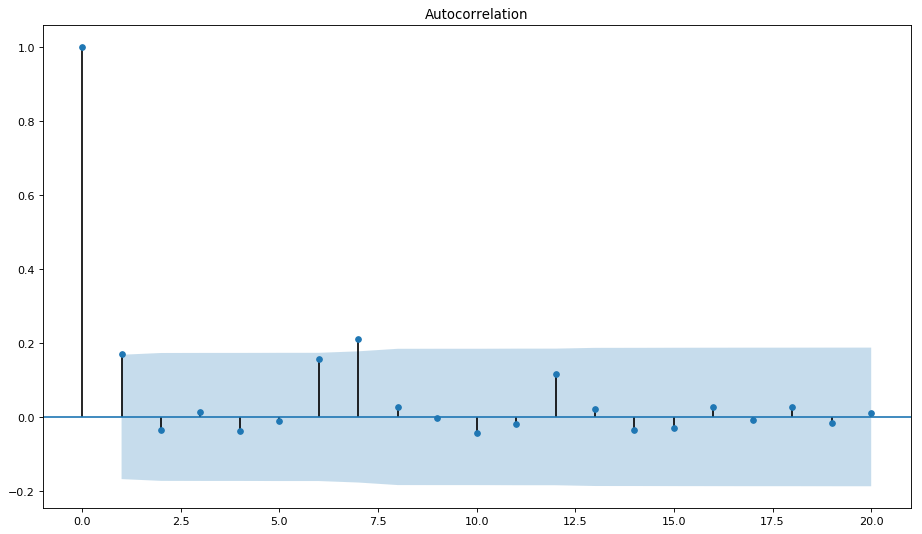

In [11]:
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(111)
plot1=plot_acf(googleRet**2,lags=20,ax=axe1)
plt.show()

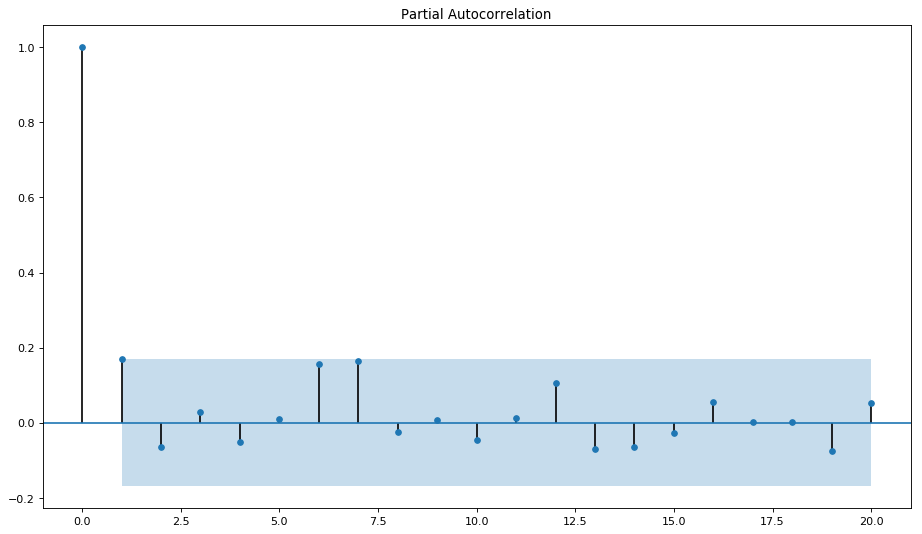

In [19]:
#python3
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(111)
plot1=plot_pacf(googleRet2**2,lags=20,ax=axe1)
plt.show()

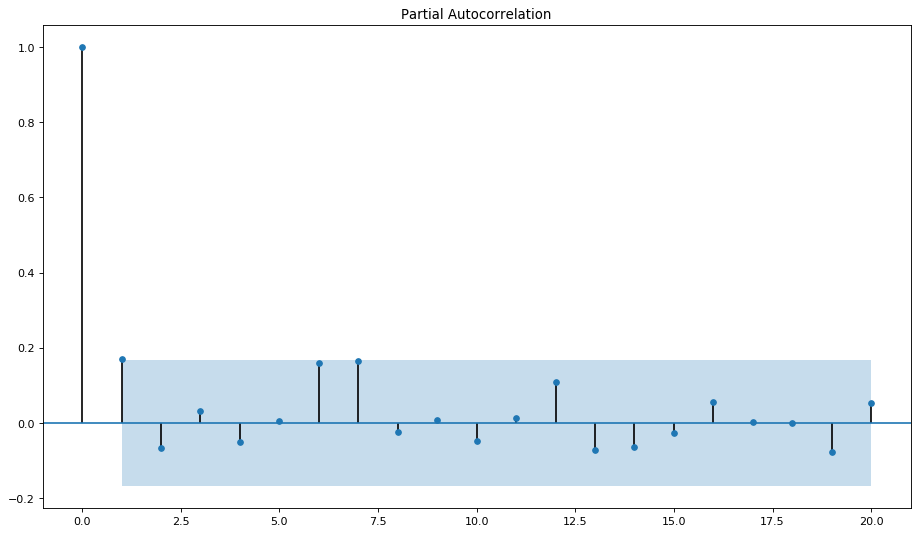

In [12]:
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(111)
plot1=plot_pacf(googleRet**2,lags=20,ax=axe1)
plt.show()

# ⑥用LjungBox检验，判断其是否存在ARCH效应

In [20]:
#python3
LjungBox=stattools.q_stat(stattools.acf(googleRet2**2)[1:13],len(googleRet2))
LjungBox[1][-1]

0.16379156584004864

In [13]:
LjungBox=stattools.q_stat(stattools.acf(googleRet**2)[1:13],len(googleRet))
LjungBox[1][-1] 

0.15208500421501212

# ⑦若存在ARCH效应，使用GARCH(1,1)模型拟合数据，写出拟合的模型

In [14]:
from arch import arch_model

In [22]:
#python3
am = arch_model(googleRet2)

In [15]:
am = arch_model(googleRet)

In [23]:
#python3
model = am.fit(update_freq=0) 

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -130.2027967977703
            Iterations: 11
            Function evaluations: 79
            Gradient evaluations: 11


In [16]:
model = am.fit(0) 

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -131.787318396
            Iterations: 12
            Function evaluations: 84
            Gradient evaluations: 12


In [24]:
#python3
print(model.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                130.203
Distribution:                  Normal   AIC:                          -252.406
Method:            Maximum Likelihood   BIC:                          -240.784
                                        No. Observations:                  135
Date:                Wed, Feb 28 2018   Df Residuals:                      131
Time:                        23:35:04   Df Model:                            4
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0230  8.510e-03      2.701  6.911e-03 [6.

In [17]:
print(model.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                131.787
Distribution:                  Normal   AIC:                          -255.575
Method:            Maximum Likelihood   BIC:                          -243.924
                                        No. Observations:                  136
Date:                Wed, Feb 28 2018   Df Residuals:                      132
Time:                        23:41:19   Df Model:                            4
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0228  9.641e-05    236.957      0.000 [2.

# 5.(python2)提取人民币对美元的汇率数据
# ①绘制其时间序列图，并判断其是否平稳

In [36]:
cny = web.DataReader('CNY=X','yahoo',
            dt.datetime(2015,1,1),dt.datetime(2015,12,31))

In [37]:
cny.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,6.1920,6.1964,6.1810,6.1920,6.1920,0.0
2015-01-01,6.1961,6.1961,6.1961,6.1961,6.1961,0.0
2015-01-02,6.1961,6.1961,6.1961,6.1961,6.1961,0.0
2015-01-05,6.1961,6.2090,6.1961,6.1961,6.1961,0.0
2015-01-06,6.2084,6.2084,6.1988,6.2084,6.2084,0.0


In [38]:
type(cny)

pandas.core.frame.DataFrame

In [39]:
ret = (cny.Close-cny.Close.shift(1))/(1.0*cny.Close.shift(1))
ret = ret.dropna()

In [40]:
import matplotlib.pyplot as plt 
import matplotlib

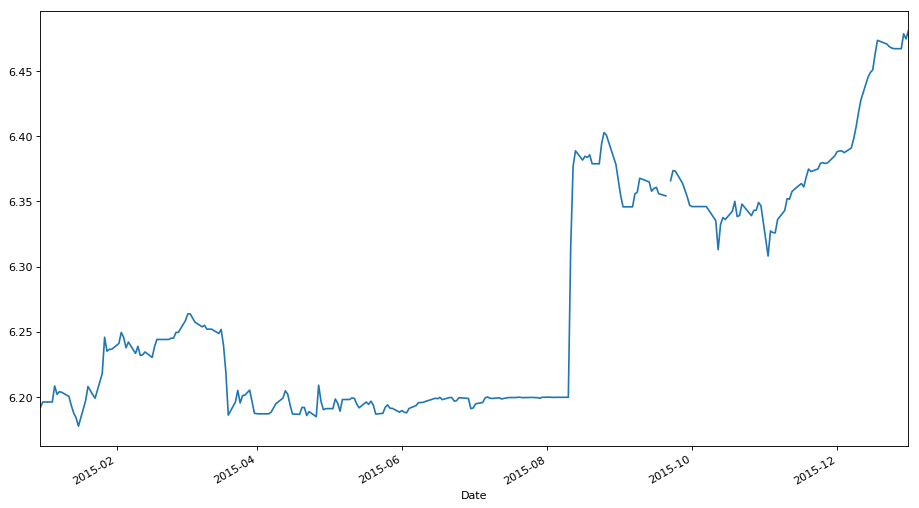

In [41]:
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(111)
plot1=cny.Close.plot(ax=axe1)
plt.show()

# ②计算该汇率的日变动百分比序列并绘制其时间序列图

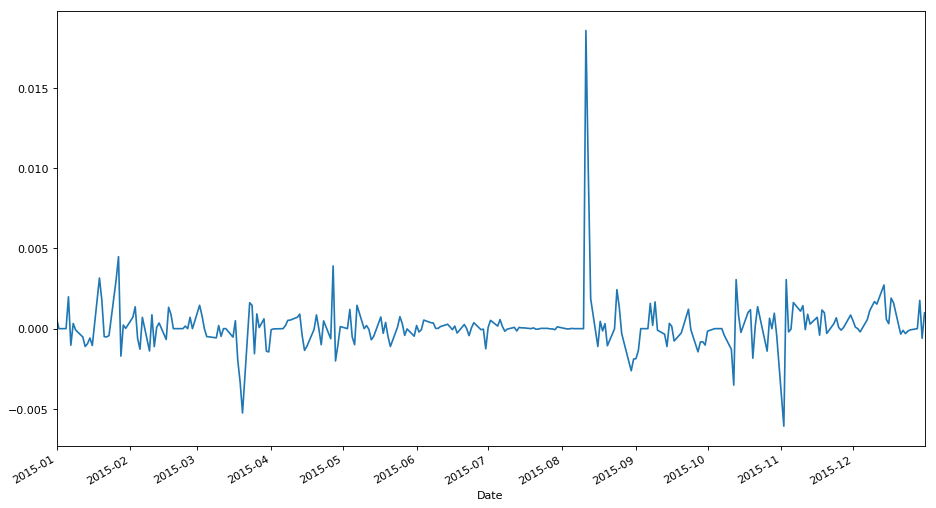

In [42]:
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(111)
plot1=ret.plot(ax=axe1)
plt.show()

# ③绘制该汇率的日变动百分比序列的ACF图以及PACF图

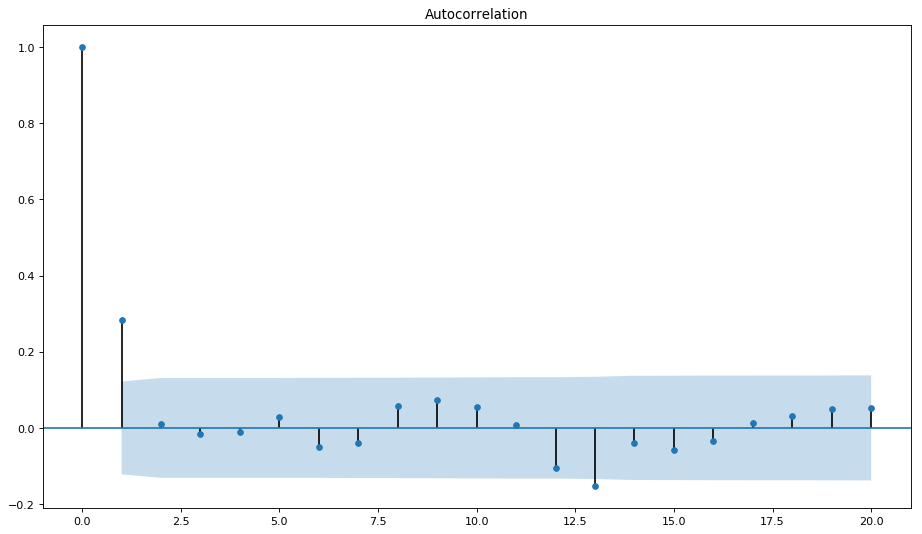

In [43]:
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(111)
plot1=plot_acf(ret,lags=20,ax=axe1)
plt.show()

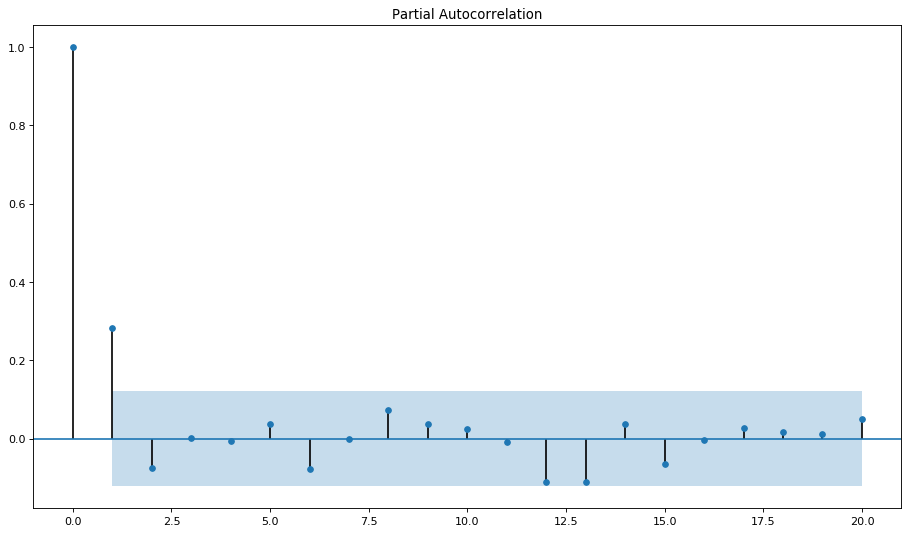

In [44]:
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(111)
plot1=plot_pacf(ret,lags=20,ax=axe1)
plt.show()

# ④进行LjungBox检测，并判断其是否是白噪声

In [45]:
LjungBox=stattools.q_stat(stattools.acf(ret)[1:13],len(ret))
LjungBox[1][-1]

0.0046524476650589728

# ⑤绘制该汇率的日变动序列的平方的时间序列图，判断是否存在波动聚集效应

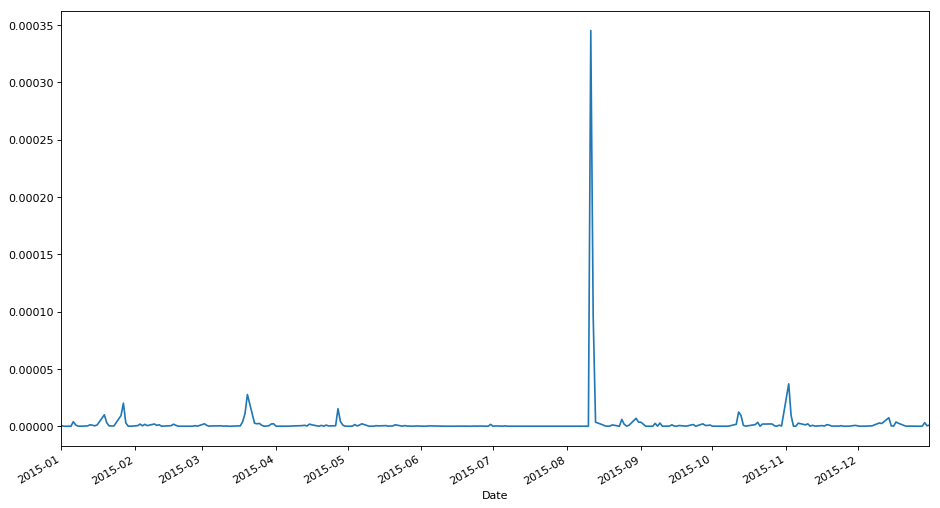

In [46]:
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(111)
plot1=(ret**2).plot(ax=axe1)
plt.show()

# ⑥绘制变动平方的ACF图以及PACF图

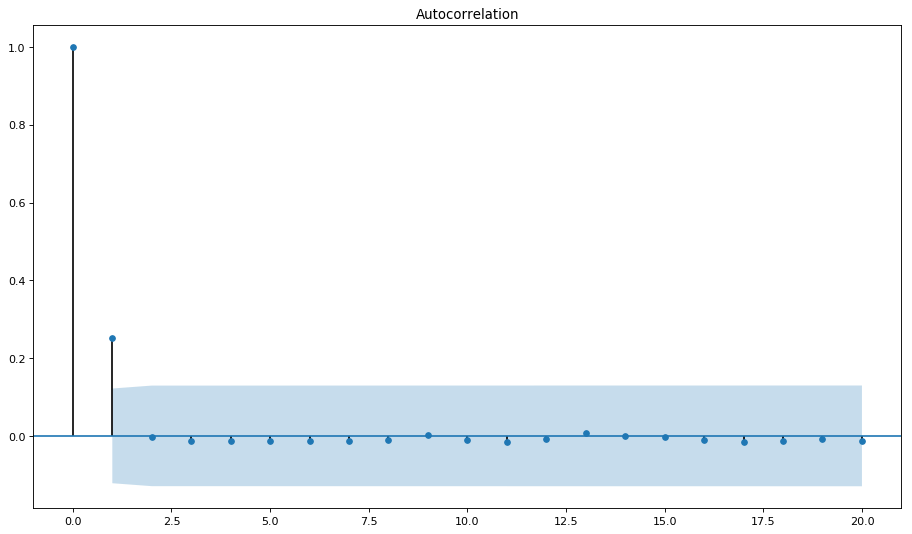

In [47]:
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(111)
plot1=plot_acf(ret**2,lags=20,ax=axe1)
plt.show()

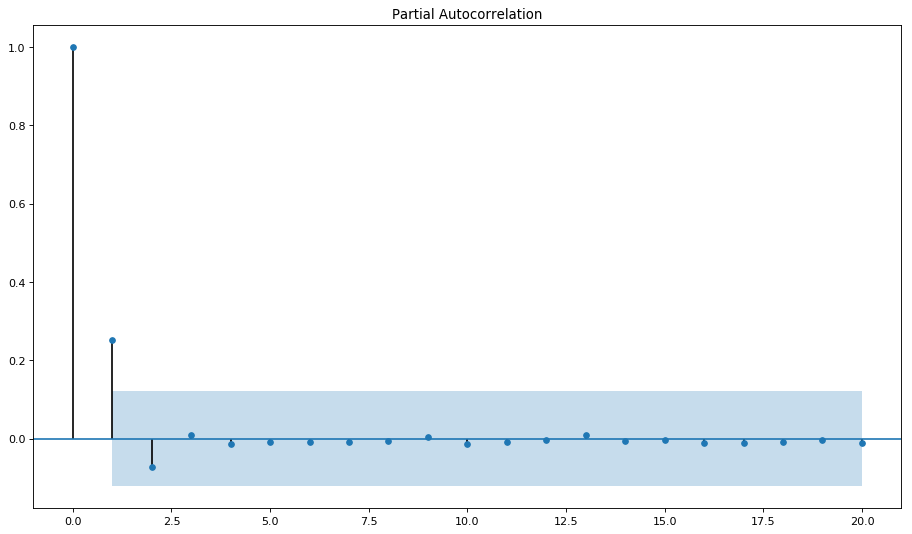

In [48]:
plt.figure(figsize=(14,8),dpi=80) 
axe1=plt.subplot(111)
plot1=plot_pacf(ret**2,lags=20,ax=axe1)
plt.show()

# ⑦对该汇率的日变动百分比平方序列是否存在ARCH效应进行判断

In [49]:
LjungBox=stattools.q_stat(stattools.acf(ret**2)[1:13],len(ret))
LjungBox[1][-1]

0.14651446594988718

# ⑧使用GARCH模型拟合数据，写出拟合模型

In [50]:
from arch.univariate import ARX,GARCH

In [51]:
model=ARX(ret,lags=1)
model.volatility=GARCH()

In [52]:
res = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: -1288.66317374
Iteration:      2,   Func. Count:     22,   Neg. LLF: -1288.66334218
Iteration:      3,   Func. Count:     35,   Neg. LLF: -1288.66347779
Iteration:      4,   Func. Count:     50,   Neg. LLF: -1288.66356269
Iteration:      5,   Func. Count:     65,   Neg. LLF: -1288.66419404
Iteration:      6,   Func. Count:     78,   Neg. LLF: -1288.66460768
Iteration:      7,   Func. Count:     95,   Neg. LLF: -1288.664595
Iteration:      8,   Func. Count:    110,   Neg. LLF: -1288.66521058
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -1288.66521065
            Iterations: 12
            Function evaluations: 110
            Gradient evaluations: 8


E:\Data_analysis_plan\Python_install\lib\site-packages\arch\univariate\distribution.py:197: RuntimeWarning: invalid value encountered in log
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)


In [26]:
print(res.summary())

                           AR - GARCH Model Results                           
Dep. Variable:                  Close   R-squared:                       0.080
Mean Model:                        AR   Adj. R-squared:                  0.076
Vol Model:                      GARCH   Log-Likelihood:                1288.67
Distribution:                  Normal   AIC:                          -2567.33
Method:            Maximum Likelihood   BIC:                          -2549.55
                                        No. Observations:                  259
Date:                Wed, Feb 28 2018   Df Residuals:                      254
Time:                        20:37:39   Df Model:                            5
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Const      1.2318e-04  1.505e-10  8.183e+05      0.000 [1.